#### Importing Libraries

In [68]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Data Wrangling

**Dataset URL:**https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

In [2]:
file = 'Automobile_data.csv'

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(file, names=headers)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [3]:
df.shape

(205, 26)

Handling Missing values<br>

1. converting "?" to NaN

In [4]:
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


2. Checking for missing values in each column

In [5]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

"normalized-losses": 41 missing data <br>
"num-of-doors": 2 missing data <br>
"bore": 4 missing data<br>
"stroke" : 4 missing data<br>
"horsepower": 2 missing data<br>
"peak-rpm": 2 missing data<br>
"price": 4 missing data<br>

Dealing with missing data<br>
- Drop data <br>
    - drop the whole row<br>
    - drop the whole column<br>
- Replace data<br>
    - replace it by mean<br>
    - replace it by frequency<br>
    - replace it based on other functions<br>

3. Replace "NaN" in various columns with the average of their columns

In [6]:
columns = ["normalized-losses", 'bore', "stroke", 'horsepower', 'peak-rpm']

for column in columns:
    avg = df[column].astype('float').mean(axis=0)
    df[column].replace(np.nan, avg, inplace=True)

4. Replace "NaN" in various columns with the most frequent class of their columns

In [7]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

We see that four is more frequent occuring term in the column, so we replace the missing values in this column with 'four'

In [8]:
df['num-of-doors'].value_counts().idxmax()

'four'

In [9]:
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

Dropping entire rows for price column as price is the target feature and we do not want to manipulate it.

In [10]:
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

**Now we have cleaned the dataset**

In [12]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type 'object'. We have to convert data types into a proper format for each column.

In [13]:
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('int')
df['price'] = df['price'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

In [14]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**we finally obtain the cleaned dataset with no missing values and all data in its proper format.**

#### Data Standardization

In [15]:
# Transforming Miles per Gallon(MPG) to Kilometers per liter(KPL) 
df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']
df[['city-L/100km', 'city-mpg', 'highway-L/100km', 'highway-mpg']].head()

,city-L/100km,city-mpg,highway-L/100km,highway-mpg
0,11.190476,21,8.703704,27
1,11.190476,21,8.703704,27
2,12.368421,19,9.038462,26
3,9.791667,24,7.833333,30
4,13.055556,18,10.681818,22


#### Data Normalization

In [16]:
#Replacing value by value/max range:[0, 1]
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


#### Binning

In [17]:
df['horsepower'] = df['horsepower'].astype(float, copy=True)

We would like four bins of equal size bandwidth. The fourth is because the function "cut" includes the rightmost value:

In [18]:
binwidth = (max(df['horsepower']) - min(df['horsepower'])) / 4
binwidth

53.5

In [19]:
bins = np.arange(min(df['horsepower']), max(df['horsepower']), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

In [20]:
grp_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=grp_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


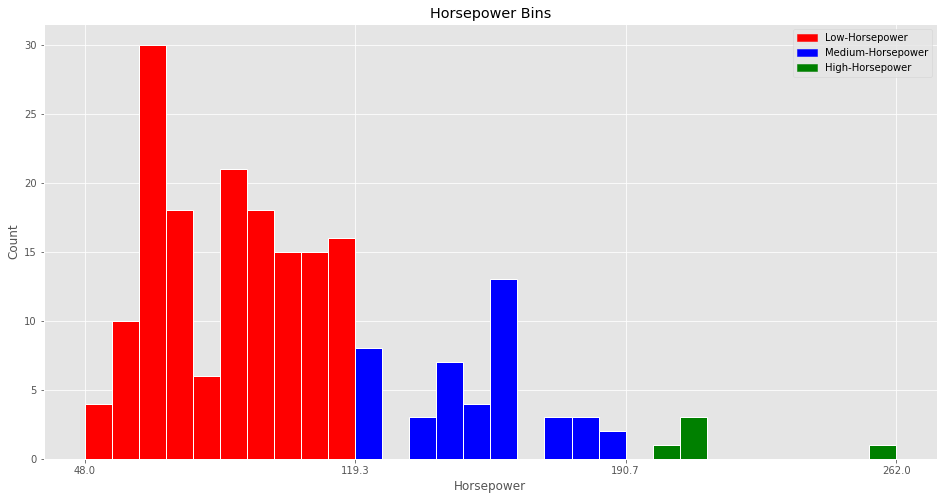

In [21]:
mpl.style.use(['ggplot'])
total_cat = 3

count, bin_edges = np.histogram(df['horsepower'], 3)
fig, ax = plt.subplots(figsize=(16, 8))
N, bins, patches = ax.hist(df['horsepower'], bins=total_cat*10, edgecolor='white', linewidth=1)
for i in range(0, 10):
    patches[i].set_facecolor('r')
for i in range(10, 20):
    patches[i].set_facecolor('b')
for i in range(20, 30):
    patches[i].set_facecolor('g')
ax.set_xticks(bin_edges)

ax.set_title('Horsepower Bins')
ax.set_ylabel('Count')
ax.set_xlabel('Horsepower')

red_patch = mpatches.Patch(color='red', label='Low-Horsepower')
blue_patch = mpatches.Patch(color='blue', label='Medium-Horsepower')
green_patch = mpatches.Patch(color='green', label='High-Horsepower')
plt.legend(handles=[red_patch,blue_patch,green_patch])

plt.show()

#### Creating Dummy Variables

In [22]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [23]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
196       gas
197       gas
198       gas
199    diesel
200       gas
Name: fuel-type, Length: 201, dtype: object

In [24]:
dummy_var1 = pd.get_dummies(df['fuel-type'])
dummy_var1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [25]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type". We will now insert this column back into our original dataset.

In [26]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop('fuel-type', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Medium,0,1


In [27]:
#Dummy variable for aspiration feature
dummy_var2 = pd.get_dummies(df['aspiration'])
dummy_var2.rename(columns={'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_var2], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [28]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


In [29]:
df.to_csv('cleaned_dataset.csv')

### Exploratory Data Analysis

In [30]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower            float64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km          float64
highway-L/100km       float64
horsepower-binned    category
fuel-type-diesel        uint8
fuel-type-gas           uint8
aspiration-std          uint8
aspiration-turbo        uint8
dtype: object

#### Potential predictor variables for price

In [31]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


We can see that possible predictor variables are 'engine-size' , 'highway-mpg', 'peak-rpm', and 'stroke'.

In [32]:
df[['price', 'engine-size', 'highway-mpg', 'peak-rpm', 'stroke']].corr()['price']

price          1.000000
engine-size    0.872335
highway-mpg   -0.704692
peak-rpm      -0.101616
stroke         0.082269
Name: price, dtype: float64

From above it can be concluded that engine-size has strong linear relationship; highway-mpg has strong negative linear relationship; peak-rpm and stroke both has weak linear relationship with price.

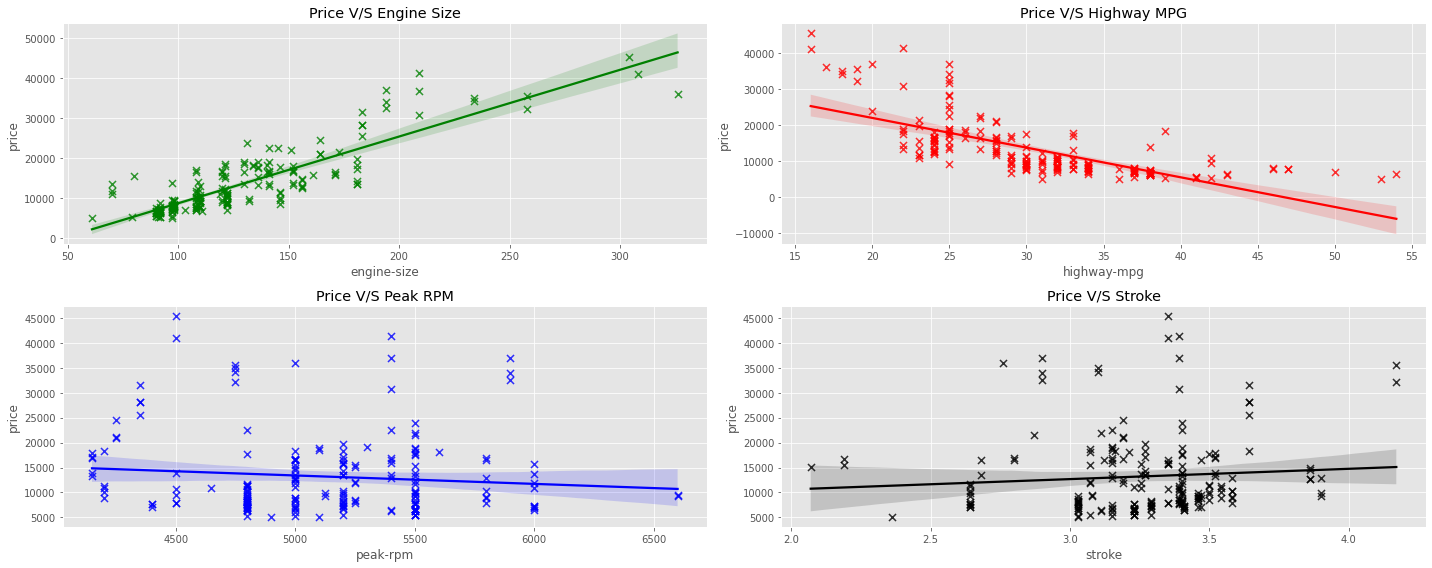

In [33]:
fig = plt.figure(figsize=(20, 8))

ax0 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax2 = fig.add_subplot(2, 2, 3)
ax3 = fig.add_subplot(2, 2, 4)

sns.regplot(x='engine-size', y='price', data=df, color='green', marker='x', scatter_kws={'s': 50}, ax=ax0)
ax0.set_title('Price V/S Engine Size')

sns.regplot(x='highway-mpg', y='price', data=df, color='red', marker='x', scatter_kws={'s': 50}, ax=ax1)
ax1.set_title('Price V/S Highway MPG')

sns.regplot(x='peak-rpm', y='price', data=df, color='blue', marker='x', scatter_kws={'s': 50}, ax=ax2)
ax2.set_title('Price V/S Peak RPM')

sns.regplot(x='stroke', y='price', data=df, color='black', marker='x', scatter_kws={'s': 50}, ax=ax3)
ax3.set_title('Price V/S Stroke')

fig.tight_layout()
plt.show()

We see that engine-size and highway-mpg have strong correlation with price while peak-rpm and stroke have weak correlation.

<AxesSubplot: xlabel='body-style', ylabel='price'>

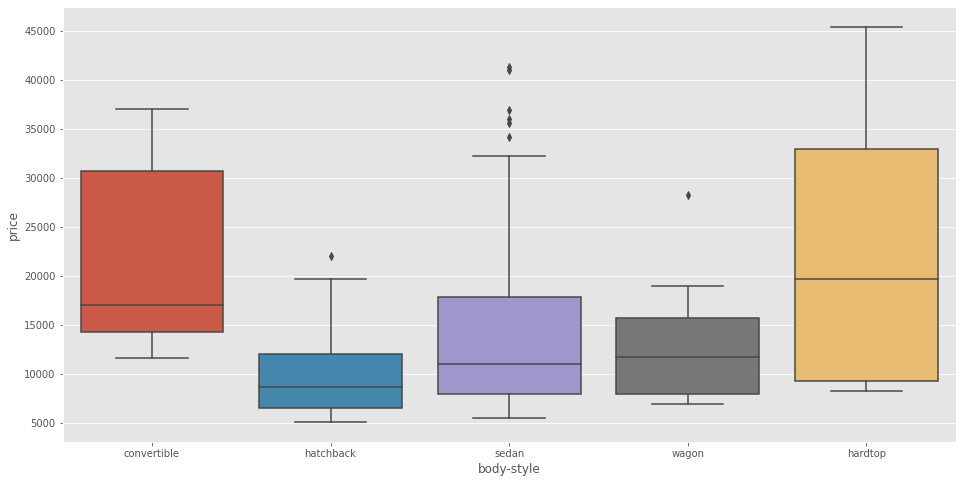

In [34]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='body-style', y='price', data=df)

distribution of price with respect to body type has a significant overlap, thus body type will not be a good indicator of price of car

<AxesSubplot: xlabel='engine-location', ylabel='price'>

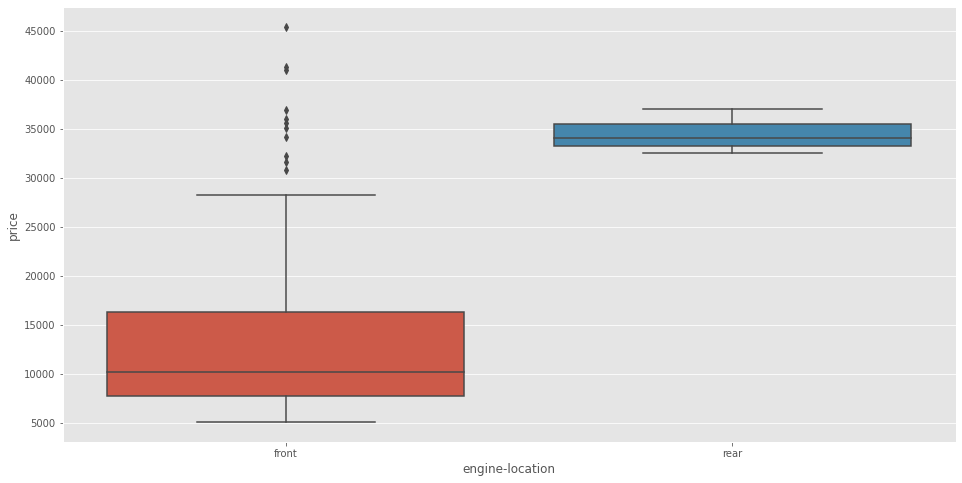

In [36]:
plt.figure(figsize=(16,8))
sns.boxplot(x="engine-location", y="price", data=df)

distribution of price between the two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

<AxesSubplot: xlabel='drive-wheels', ylabel='price'>

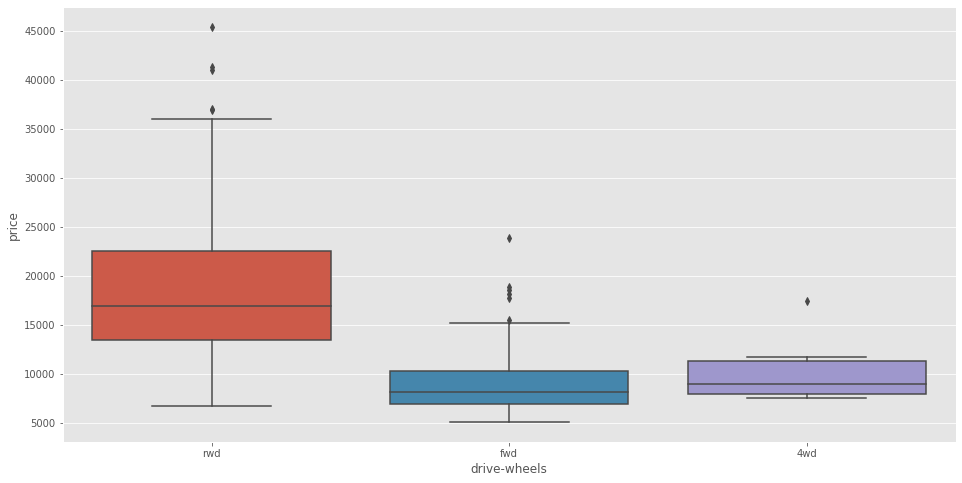

In [37]:
plt.figure(figsize=(16, 8))
sns.boxplot(x="drive-wheels", y="price", data=df)

distribution of price between the different drive-wheels categories differs. As such, drive-wheels could potentially be a predictor of price.

#### Statistical Analysis

In [38]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500,1.000000,1.000000,1.000000,1.000000


In [39]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [40]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [42]:
drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels': 'value-counts'}, inplace=True)
drive_wheel_counts.index.name = 'drive-wheels'
drive_wheel_counts

,value-counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [43]:
#engine_location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value-counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value-counts
engine-location,
front,198
rear,3


Engine location is not a good descriptor of price as data is skewed in one category massively

#### Grouped Analysis

In [44]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [45]:
df_group = df[['drive-wheels', 'price']]
df_group_results = df_group.groupby(['drive-wheels'], as_index=False).mean()
df_group_results

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

In [46]:
df_group = df[['drive-wheels', 'body-style', 'price']]
df_group_results = df_group.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_group_results

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [47]:
grouped_pivot = df_group_results.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [48]:
#Filling Missing data with 0 in pivot table
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

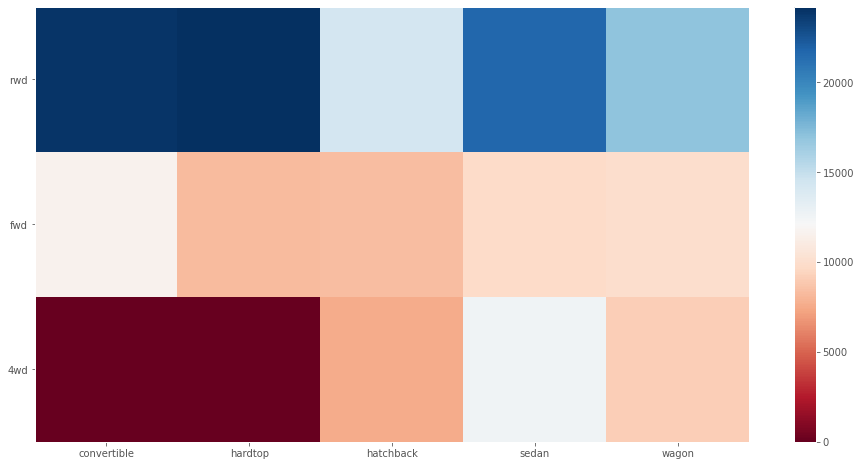

In [53]:
#heatmap for body-stype and drive-wheels
fig, ax=plt.subplots(figsize=(16, 8))
im=ax.pcolor(grouped_pivot, cmap='RdBu')

row_labels=grouped_pivot.columns.levels[1]
col_labels=grouped_pivot.index
ax.set_xticks(np.arange(grouped_pivot.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
plt.xticks(rotation=0)

fig.colorbar(im)

plt.show()

#### ANOVA

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. <br>

- **F-Test Score:** ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means. <br>
<br>
- **P-value:**  P-value tells us the statistical significance of our calculated score value. <br>
<br>
If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

1. ANOVA on Drive Wheel variables

In [55]:
df_group = df[['drive-wheels', 'price']]
groups = df_group[['drive-wheels', 'price']].groupby(['drive-wheels'])
groups.head(5)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [56]:
groups.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [57]:
#ANOVA
f_value, p_value = stats.f_oneway(groups.get_group('fwd')['price'], groups.get_group('rwd')['price'], groups.get_group('4wd')['price'])
print(f'ANOVA Results: F-Score:{f_value}, P-value:{p_value}')

ANOVA Results: F-Score:67.95406500780399, P-value:3.3945443577149576e-23


a large F test score showing the importance of Drive Wheels for price prediction. The large F test score suggests that the mean price value for these three groups| varies alot. Consequently showing a strong correlation of these three groups with price.

In [59]:
#Checking for pair-wise ANOVA for drive-wheels
f_value, p_value = stats.f_oneway(groups.get_group('fwd')['price'], groups.get_group('rwd')['price'])
print(f'ANOVA Analysis for (fwd, rwd), F-Score:{f_value}, P-value:{p_value}')
print()
f_value, p_value = stats.f_oneway(groups.get_group('fwd')['price'], groups.get_group('4wd')['price'])
print(f'ANOVA Analysis for (fwd, 4wd), F-Score:{f_value}, P-value:{p_value}')
print()
f_value, p_value = stats.f_oneway(groups.get_group('rwd')['price'], groups.get_group('4wd')['price'])
print(f'ANOVA Analysis for (rwd, 4wd), F-Score:{f_value}, P-value:{p_value}')

ANOVA Analysis for (fwd, rwd), F-Score:130.5533160959111, P-value:2.2355306355677366e-23

ANOVA Analysis for (fwd, 4wd), F-Score:0.6654657502523033, P-value:0.4162011669784502

ANOVA Analysis for (rwd, 4wd), F-Score:8.580681368924756, P-value:0.004411492211225367


Separate results show that main variation of price mean values is in fwd and rwd groups. So even inside feature "Drive Wheels", these two groups are most important.

#### Final results of EDA

- Continuous Variables that are useful
1. length
2. Width
3. Curb-weight
4. Engine-Size
5. Horsepower
6. City-mpg
7. Highway-mpg
8. Wheel-Base
9. Bore

- Categorical Variables that are useful
1. Drive-wheel

In [60]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'highway-L/100km', 'horsepower-binned',
       'fuel-type-diesel', 'fuel-type-gas', 'aspiration-std',
       'aspiration-turbo'],
      dtype='object')

### Modelling and Evaluation

In [61]:
#developing model using important variables found above
df_new = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'bore', 'wheel-base', 'city-mpg', 'length', 'width']]

#splitting data into train-test split
X_train, X_test, y_train, y_test = train_test_split(df_new, df['price'], test_size=0.30, random_state=410)
print('Training Sample Size: ',X_train.shape[0])
print('Testing Sample Size: ', X_test.shape[0])

Training Sample Size:  140
Testing Sample Size:  61


**1. Multiple Linear Regression**

In [62]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
print(f'R_squared value for Multiple Linear Regression: {lm.score(X_test, y_test)}')

R_squared value for Multiple Linear Regression: 0.7852975759425777


We can say that ~ 79% of the variation of the price is explained by this multiple linear regression model

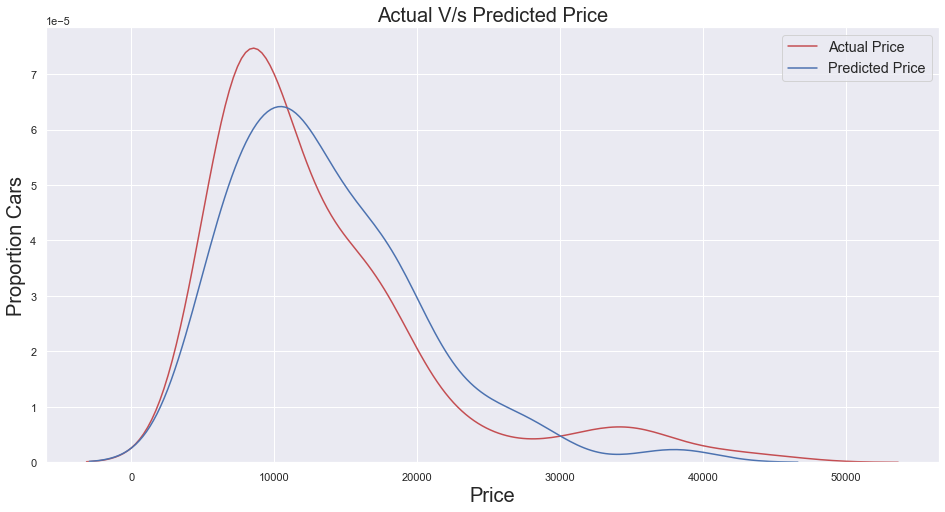

In [75]:
sns.set()
predicted = lm.predict(X_test)

plt.figure(figsize=(16, 8))
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Price')
sns.distplot(predicted, hist=False, color='b', label='Predicted Price', ax=ax1)

plt.title('Actual V/s Predicted Price', size=20)
plt.xlabel('Price', size=20)
plt.ylabel('Proportion Cars', size=20)
plt.legend(fontsize='large')
plt.show()
plt.close()

Fitted values are reasonably close to the actual values, since the two distributions overlap a bit.

**2. Polynomial Linear Regression**

In [76]:
#Model Pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [77]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can now normalize the data, perform a transform and fit the model simultaneously.

In [78]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [79]:
print(f'The R_squared value for Polynomial Linear Regression is: {pipe.score(X_test, y_test)}')

The R_squared value for Polynomial Linear Regression is: 0.6242562426632458


We can say that ~ 62% of the variation of the price is explained by this polynomial regression model

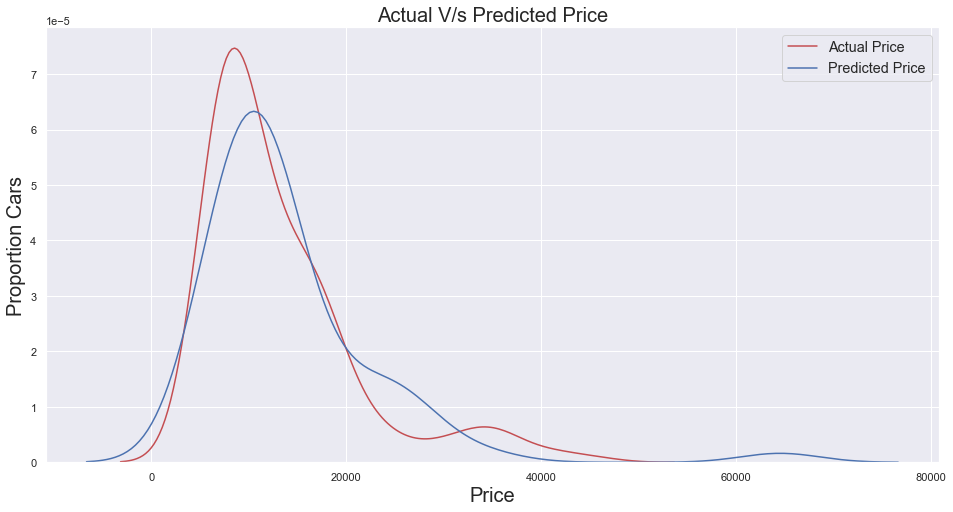

In [80]:
predicted = pipe.predict(X_test)

plt.figure(figsize=(16, 8))
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Price')
sns.distplot(predicted, hist=False, color='b', label='Predicted Price', ax=ax1)

plt.title('Actual V/s Predicted Price', size=20)
plt.xlabel('Price', size=20)
plt.ylabel('Proportion Cars', size=20)
plt.legend(fontsize='large')
plt.show()
plt.close()

It can be seen that for Polynomial Linear Regression, the fitted values are much less closer to the actual values than Multiple Linear Regression.

**3. Random Forest Regressor**

In [82]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
print("The R_squared value for Random Forest Regressor is: ", rf.score(X_test, y_test))

The R_squared value for Random Forest Regressor is:  0.8970282464596152


We can say that ~ 90% of the variation of the price is explained by this random forest model

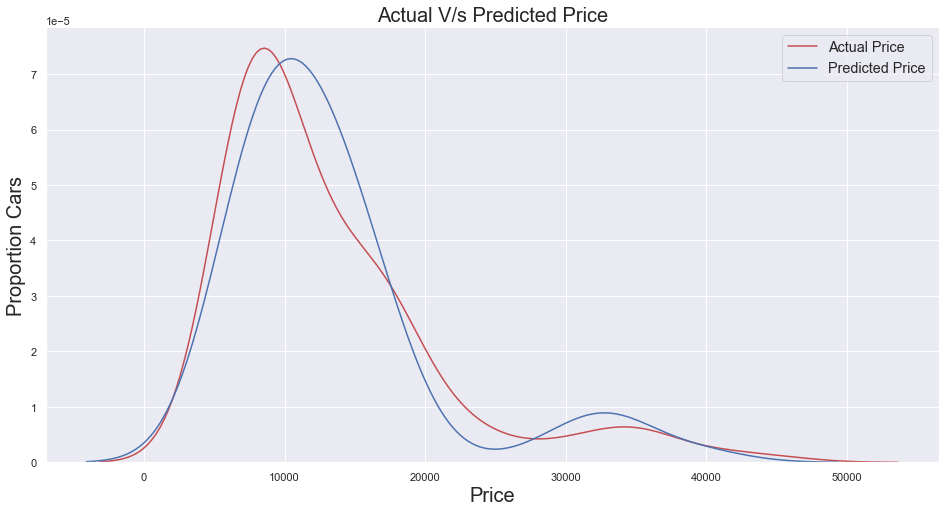

In [85]:
predicted = rf.predict(X_test)

plt.figure(figsize=(16, 8))
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Price')
sns.distplot(predicted, hist=False, color='b', label='Predicted Price', ax=ax1)

plt.title('Actual V/s Predicted Price', size=20)
plt.xlabel('Price', size=20)
plt.ylabel('Proportion Cars', size=20)
plt.legend(fontsize='large')
plt.show()
plt.close()

We can see that the random forest regressor performs the best among the three models.

**Model Refinement for Random Forest Regressor**

In [90]:
#Grid of Hyperparamenter
n_estimators = [100, 500]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 50, 80, 100]
max_depth.append(None)
min_samples_split = [2, 6, 8]
min_samples_leaf = [1, 3, 5, 6]
bootstrap = [True, False]

grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [91]:
rf_grid = GridSearchCV(estimator=rf, param_grid=grid, cv=2, n_jobs=-1, verbose=2)

In [92]:
rf_grid.fit(X_train, y_train)

Fitting 2 folds for each of 576 candidates, totalling 1152 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 50, 80, 100, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 6],
                         'min_samples_split': [2, 6, 8],
                         'n_estimators': [100, 500]},
             verbose=2)

In [93]:
best_rf = rf_grid.best_estimator_
best_rf

RandomForestRegressor(max_depth=50, max_features='auto')

In [94]:
print(f'Refined Random Forest R_squared value: {best_rf.score(X_test, y_test)}')

Refined Random Forest R_squared value: 0.895713119315354


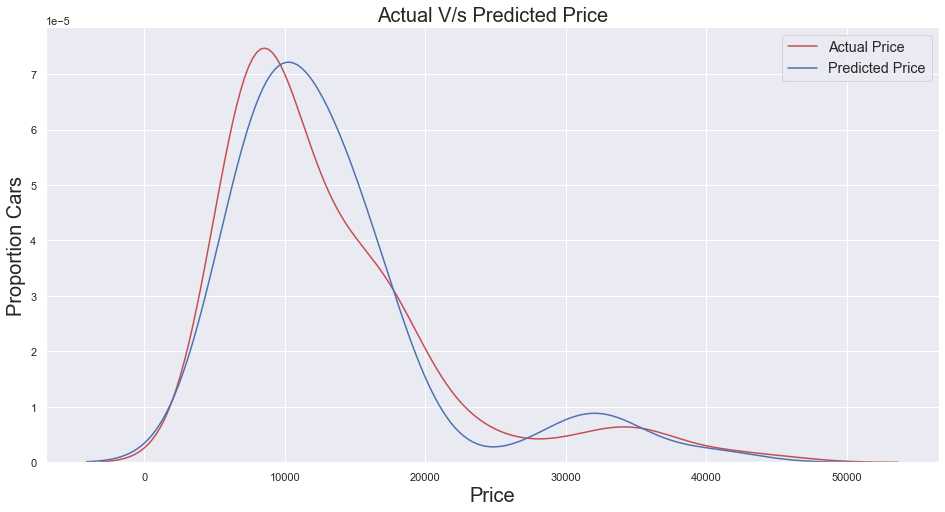

In [95]:
predicted = best_rf.predict(X_test)

plt.figure(figsize=(16, 8))
ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Price')
sns.distplot(predicted, hist=False, color='b', label='Predicted Price', ax=ax1)

plt.title('Actual V/s Predicted Price', size=20)
plt.xlabel('Price', size=20)
plt.ylabel('Proportion Cars', size=20)
plt.legend(fontsize='large')
plt.show()
plt.close()

We can see that the refined best model can predict the prices of cars much closely to the actual values.